# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [1]:
import zipfile
from PIL import Image,ImageOps,ImageDraw
import pytesseract
import cv2 as cv
import numpy as np
import math
# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# the rest is up to you!
print("Libraries imported")

Libraries imported


### Iterate through zipfile and save all binarized version in a global dictionary

In [2]:
binarized_img = {}

with zipfile.ZipFile('readonly/images.zip','r') as zipped:
    for file in zipped.infolist():
        with zipped.open(file) as loc:
            image = Image.open(loc).convert('RGB')
            binarized_img[file.filename] = {'pil_img':image}
            
print("Global dictionary with images from zipfile created")

Global dictionary with images from zipfile created


### Parsing all the text in images

In [3]:
for img_name in binarized_img.keys():
    text = pytesseract.image_to_string(binarized_img[img_name]['pil_img'])
    binarized_img[img_name]['text'] = text
    
print("Text Parsed")

Text Parsed


### Bounding boxes for faces

In [4]:
for img_name in binarized_img.keys():
    opencv_image = np.array(binarized_img[img_name]['pil_img']) 
    gray = cv.cvtColor(opencv_image,cv.COLOR_BGR2GRAY)
    bounding_boxes = face_cascade.detectMultiScale(gray,1.3,4)
    binarized_img[img_name]['face'] = []
    for x,y,w,h in bounding_boxes:
        face = binarized_img[img_name]['pil_img'].crop((x,y,x+w,y+h))
        binarized_img[img_name]['face'].append(face)
        
print("Bounding boxes created")

Bounding boxes created


### Thumbnails

In [5]:
for img_name in binarized_img.keys():
    for face in binarized_img[img_name]['face']:
        face.thumbnail((100,100),Image.ANTIALIAS)
        
print("Thumbnails created")

Thumbnails created


### Search function

In [6]:
def search(keyword):
    for img_name in binarized_img:
        if(keyword in binarized_img[img_name]['text']):
            if(len(binarized_img[img_name]['face']) != 0):
                print("Result found in file {}".format(img_name))
                height = math.ceil(len(binarized_img[img_name]['face'])/5)
                contact_sheet = Image.new('RGB',(500, 100*height))
                x = 0
                y = 0
                for img in binarized_img[img_name]['face']:
                    contact_sheet.paste(img,(x,y))
                    if x + 100 == contact_sheet.width:
                        x = 0
                        y += 100
                    else:
                        x += 100        
                display(contact_sheet)
            else:
                print("Result found in file {} \nBut there were no faces in that file\n".format(img_name))
    return

### Search for keyword "pizza"

Result found in file a-2.png


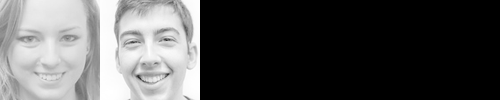

In [7]:
search('pizza')

### Search for keyword "Christopher"

Result found in file a-0.png


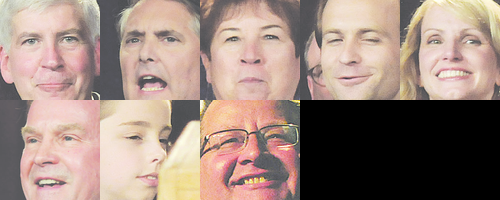

Result found in file a-3.png


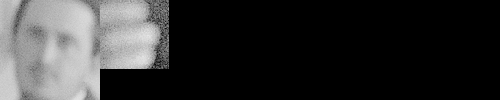

In [8]:
search('Christopher')

### Search for keyword "Mark"

Result found in file a-0.png


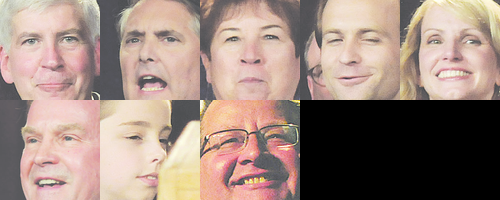

Result found in file a-1.png


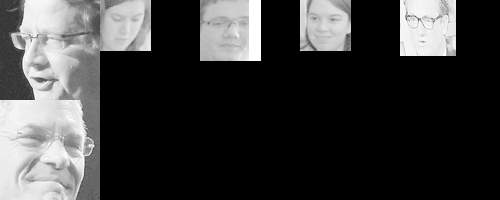

Result found in file a-10.png 
But there were no faces in that file

Result found in file a-13.png


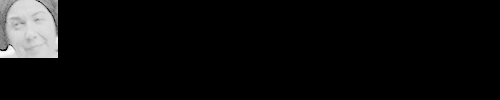

Result found in file a-2.png


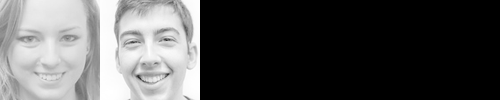

Result found in file a-3.png


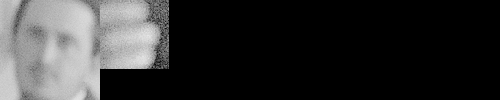

Result found in file a-8.png 
But there were no faces in that file



In [9]:
search('Mark')

### EOF Thank You!